# Exploratory Data Analysis
## Summative Assessment 1
### Karl Isaiah Buenafe

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [464]:
df = pd.read_csv('EDA_Ecommerce_Assessment.csv')
df.head(5)

,Customer_ID,Gender,Age,Browsing_Time,Purchase_Amount,Number_of_Items,Discount_Applied,Total_Transactions,Category,Satisfaction_Score
0,1,Male,65,46.55,231.81,6,17,16,Clothing,2
1,2,Female,19,98.80,472.78,8,15,43,Books,4
2,3,Male,23,79.48,338.44,1,28,31,Electronics,1
3,4,Male,45,95.75,37.13,7,43,27,Home & Kitchen,5
4,5,Male,46,33.36,235.53,3,10,33,Books,3


## Summary 

In [519]:
df2=df.set_index('Customer_ID')

df2=df2.describe()

df2.loc["mode"]= df2.mode().iloc[0]
df2

,Age,Browsing_Time,Purchase_Amount,Number_of_Items,Discount_Applied,Total_Transactions,Satisfaction_Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,43.606000,59.868937,247.962540,4.989667,24.345000,24.683000,3.066000
std,14.963759,34.293489,140.875783,2.561200,14.709433,14.214518,1.402723
min,18.000000,1.000000,5.030000,1.000000,0.000000,1.000000,1.000000
25%,31.000000,29.985000,128.695000,3.000000,12.000000,12.000000,2.000000
50%,44.000000,59.160000,245.090000,5.000000,24.000000,24.000000,3.000000
75%,57.000000,89.330000,367.200000,7.000000,37.000000,37.000000,4.000000
max,69.000000,119.950000,499.610000,9.000000,49.000000,49.000000,5.000000
mode,14.963759,1.000000,5.030000,1.000000,0.000000,1.000000,1.000000


Summary of the dataset

# UNIVARIATE DATA ANALYSIS:

## Distribution of purchase amount, number of items purchased, and satisfaction score

### Purchase amount
Description: Total amount spent in a single transaction.

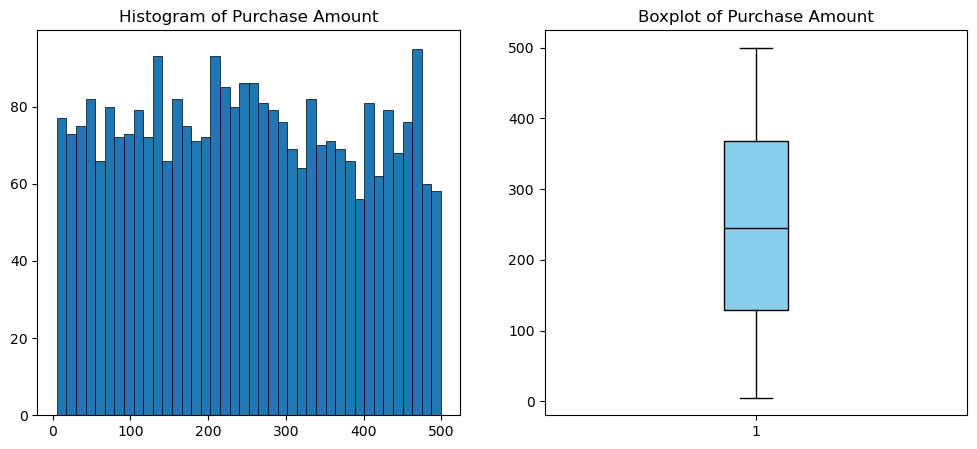

In [466]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(df['Purchase_Amount'], bins=40, edgecolor="black", linewidth=0.5)
axes[0].set_title("Histogram of Purchase Amount") 


axes[1].boxplot(df['Purchase_Amount'], patch_artist=True, 
                boxprops=dict(facecolor='skyblue', color='black'), 
                medianprops=dict(color="black"))
axes[1].set_title("Boxplot of Purchase Amount")

plt.show()


### Number of Items
Description: Total number of items purchased

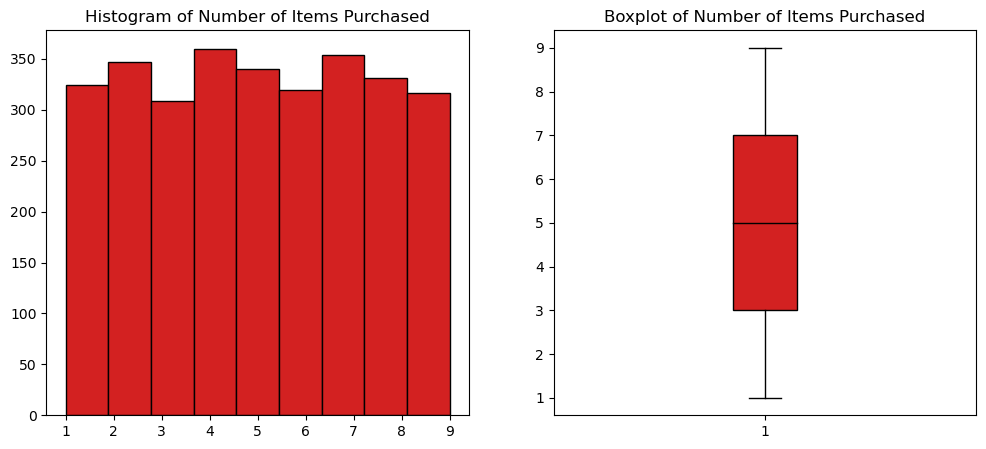

In [467]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(df['Number_of_Items'], bins=9, edgecolor="black", linewidth=1, color="#d32121")
axes[0].set_title("Histogram of Number of Items Purchased") 


axes[1].boxplot(df['Number_of_Items'], patch_artist=True, 
                boxprops=dict(facecolor='#d32121', color='black'), 
                medianprops=dict(color="black"))
axes[1].set_title("Boxplot of Number of Items Purchased")

plt.show()


### Satisfaction Score
Description: Customer satisfaction score (1-5 scale)

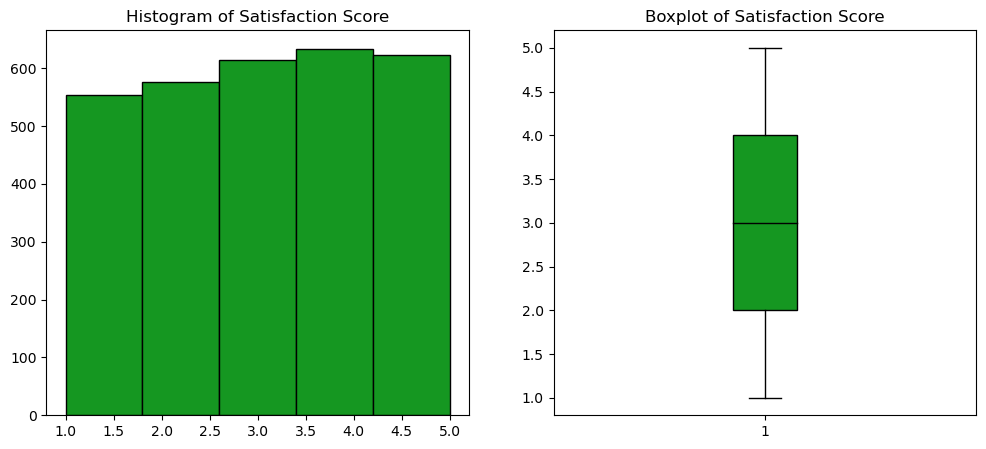

In [468]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(df['Satisfaction_Score'], bins=5, edgecolor="black", linewidth=1, color="#159721")
axes[0].set_title("Histogram of Satisfaction Score") 


axes[1].boxplot(df['Satisfaction_Score'], patch_artist=True, 
                boxprops=dict(facecolor='#159721', color='black'), 
                medianprops=dict(color="black"))
axes[1].set_title("Boxplot of Satisfaction Score")

plt.show()


Remark: Based on the graphs, we can see that there are no outlier for any of the variables.

### Central tendency and spread of Purchase_Amount

In [469]:
PAdf=pd.DataFrame(df['Purchase_Amount'])
PA=PAdf.describe()

In [470]:
PA.loc['variance'] = np.var(PA)
PA.loc['Standard deviation'] = np.std(PA)
PA.loc['Mode'] = PAdf.mode().iloc[0]
PA

,Purchase_Amount
count,3000.000000
mean,247.962540
std,140.875783
min,5.030000
25%,128.695000
50%,245.090000
75%,367.200000
max,499.610000
variance,857206.615645
Standard deviation,269213.405497


## Browsing time and Purchase amount between male and female

##### Summary of the browsing time and purchase amount of female customers

In [471]:
fm=df[df["Gender"]=="Female"]
m=df[df["Gender"]=="Male"]

PB_fm=pd.DataFrame(fm[["Gender","Purchase_Amount","Browsing_Time"]])
PB_fm=PB_fm.rename(columns={"Purchase_Amount":"Female Purchase_Amount", "Browsing_Time": "Female Browsing_Time"})
PB_fm.describe()



,Female Purchase_Amount,Female Browsing_Time
count,1483.000000,1483.000000
mean,248.949130,60.195482
std,141.729474,34.021387
min,5.030000,1.110000
25%,129.755000,31.630000
50%,243.590000,59.650000
75%,371.925000,89.130000
max,499.610000,119.940000


##### Summary of the browsing time and purchase amount of male customers

In [472]:
PB_m=pd.DataFrame(m[["Gender","Purchase_Amount","Browsing_Time"]])
PB_m=PB_m.rename(columns={"Purchase_Amount":"Male Purchase_Amount", "Browsing_Time": "Male Browsing_Time"})
PB_m.describe()

,Male Purchase_Amount,Male Browsing_Time
count,1517.000000,1517.000000
mean,246.998062,59.549710
std,140.076220,34.565657
min,5.120000,1.000000
25%,127.140000,29.260000
50%,245.760000,58.540000
75%,361.690000,89.950000
max,499.290000,119.950000


### Browsing time distribution of male and female customers

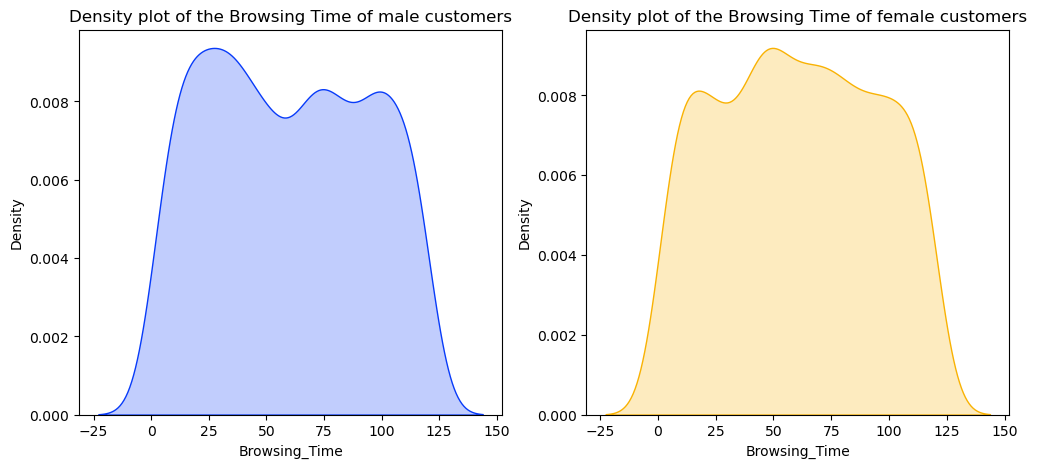

In [473]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.kdeplot(PA_m['Browsing_Time'], ax = axes[0], linewidth=1, color="#083bf9", fill="#083bf9")
axes[0].set_title("Density plot of the Browsing Time of male customers") 


sns.kdeplot(PA_fm['Browsing_Time'],ax = axes[1],linewidth=1, color="#f9b203", fill="#f9b203")
axes[1].set_title("Density plot of the Browsing Time of female customers") 

plt.show()

### Purchase amount distribution of male and female customers

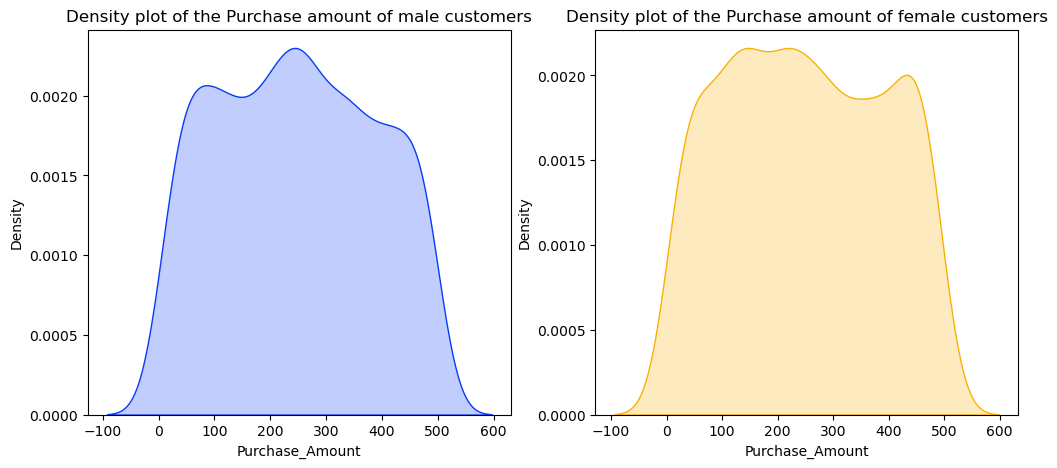

In [474]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.kdeplot(PA_m['Purchase_Amount'], ax = axes[0], linewidth=1, color="#083bf9", fill="#083bf9")
axes[0].set_title("Density plot of the Purchase amount of male customers") 


sns.kdeplot(PA_fm['Purchase_Amount'],ax = axes[1],linewidth=1, color="#f9b203", fill="#f9b203")
axes[1].set_title("Density plot of the Purchase amount of female customers") 

plt.show()

Remark: Based on the density plots of the two variables between male and female customers, we can see that though the purchase amount and browsing time of female customers are higher than male customers. However, the difference is not significant based on the summary tables

### Applying logarithmic transformation on browsing time

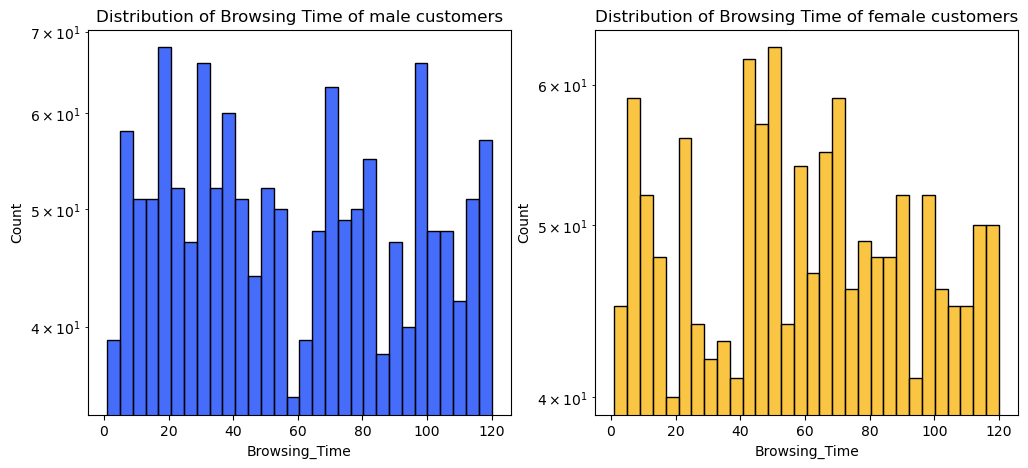

In [475]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.histplot(PA_m['Browsing_Time'], bins=30, ax = axes[0], linewidth=1, color="#083bf9", log=True)
axes[0].set_title("Distribution of Browsing Time of male customers") 


sns.histplot(PA_fm['Browsing_Time'],bins=30, ax = axes[1],linewidth=1, color="#f9b203", log=True)
axes[1].set_title("Distribution of Browsing Time of female customers") 

plt.show()

### Fitting and predicting the data

In [476]:
from sklearn.linear_model import LinearRegression


x = np.array(df["Browsing_Time"]).reshape((-1, 1))
y = np.array(df["Purchase_Amount"])

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.0003641880980534973
intercept: 252.65595638391824
slope: [-0.07839485]


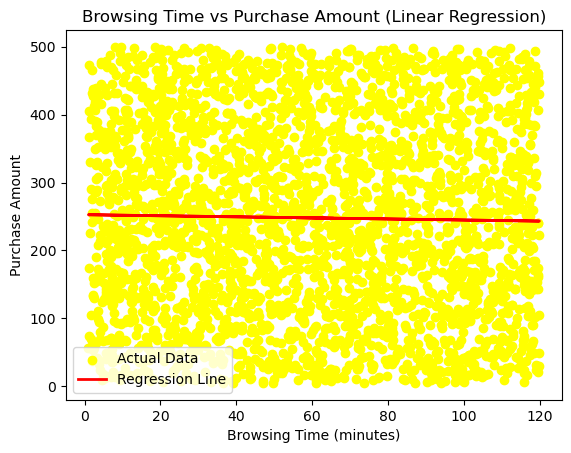

In [477]:
y_pred = model.predict(x)


plt.scatter(x, y, color="yellow", label="Actual Data")

plt.plot(x, y_pred, color="red", linewidth=2, label="Regression Line")

plt.xlabel("Browsing Time (minutes)")
plt.ylabel("Purchase Amount")
plt.title("Browsing Time vs Purchase Amount (Linear Regression)")
plt.legend()

plt.show()

Remark: The scattered points of the plot shows the data does not follow a linear pattern which could mean that linear regression is not the suitable transformation or that the <strong>browsing time cannot predict the purchase amount of the customers </strong>. 

Since the coefficient of determination is close to 0, we can conclude that <strong>the browsing time cannot determine the the total amount spent by the customer of the customers.</strong>

# BIVARIATE DATA ANALYSIS:

#### RELATIONSHIP BETWEEN PURCHASE_AMOUNT AND NUMBER_OF_ITEMS

In [478]:
df = pd.read_csv('EDA_Ecommerce_Assessment.csv')
df.head(5)

,Customer_ID,Gender,Age,Browsing_Time,Purchase_Amount,Number_of_Items,Discount_Applied,Total_Transactions,Category,Satisfaction_Score
0,1,Male,65,46.55,231.81,6,17,16,Clothing,2
1,2,Female,19,98.80,472.78,8,15,43,Books,4
2,3,Male,23,79.48,338.44,1,28,31,Electronics,1
3,4,Male,45,95.75,37.13,7,43,27,Home & Kitchen,5
4,5,Male,46,33.36,235.53,3,10,33,Books,3


#### Plotting Number_of_Items x Purchase_Amount

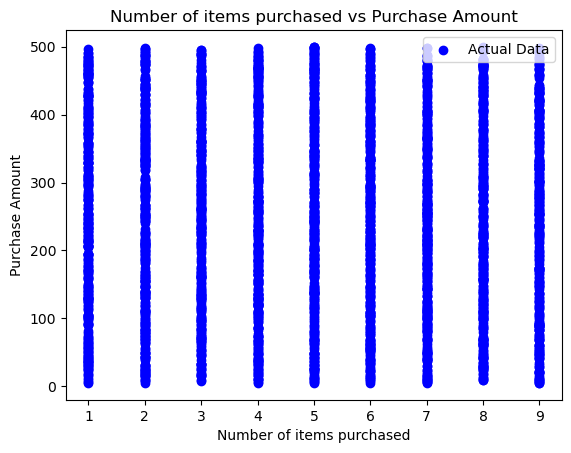

In [479]:
x = np.array(df['Number_of_Items'])

y = np.array(df['Purchase_Amount'])

plt.scatter(x, y, color="blue", label="Actual Data")

plt.xlabel("Number of items purchased")
plt.ylabel("Purchase Amount")
plt.title("Number of items purchased vs Purchase Amount")
plt.legend()

plt.show()

In [480]:
df_noi=df.groupby('Number_of_Items')['Purchase_Amount'].sum()
df_noi=pd.DataFrame(df_noi)

df_noi

,Purchase_Amount
Number_of_Items,
1,81719.29
2,85538.94
3,78135.31
4,88919.74
5,86878.89
6,78428.31
7,83723.87
8,81642.93
9,78900.34


Remark:Data from the scatter plot shows that there's no relationship between the number of items purchased and the  total amount spent by the customers. Additionally, the table above shows that the total amount spent by customers is not directly proportionate to the number of items purchased.

### Fitting and plotting using linear regression and polynomial regression

In [481]:
x1 = np.array(df['Browsing_Time']).reshape(-1,1)
y1 = np.array(df['Purchase_Amount'])


x2 = np.array(df['Browsing_Time'])
y2 = np.array(df['Purchase_Amount'])

model = LinearRegression().fit(x1, y1)
y_pred = model.predict(x1)

linear_r_sq = model.score(x1, y1)
Poly_r_sq = r2_score(y2, mymodel(x2))

scores={"Linear Regression R^2":(linear_r_sq), "Polynomial Regression R^2":(Poly_r_sq)}

score= pd.DataFrame([scores])

mymodel = np.poly1d(np.polyfit(x2, y2, 3))
speed = mymodel(17)
print(speed)


251.5540971190553


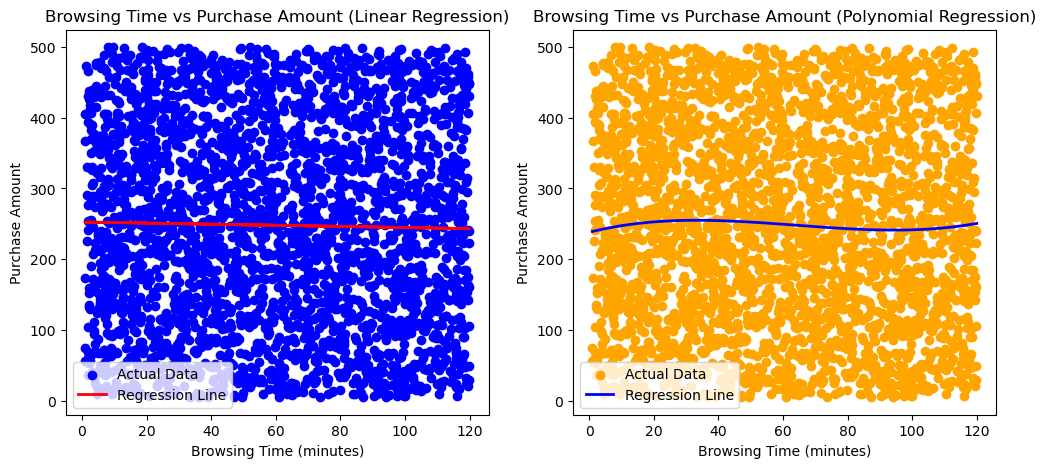

In [482]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

from sklearn.metrics import r2_score


# LINEAR REGRESSION
axes[0].scatter(x1, y1, color="blue", label="Actual Data")
axes[0].plot(x1, y_pred, color="red", linewidth=2, label="Regression Line")

axes[0].set_xlabel("Browsing Time (minutes)")
axes[0].set_ylabel("Purchase Amount")
axes[0].set_title("Browsing Time vs Purchase Amount (Linear Regression)")
axes[0].legend()

# POLYNOMIAL REGRESSION

myline = np.linspace(1, 120, 150)
axes[1].scatter(x2, y2, color="orange", label="Actual Data")
axes[1].plot(myline, mymodel(myline), linewidth=2, color="blue", label="Regression Line")

axes[1].set_xlabel("Browsing Time (minutes)")
axes[1].set_ylabel("Purchase Amount")
axes[1].set_title("Browsing Time vs Purchase Amount (Polynomial Regression)")
axes[1].legend()

plt.show()

### using Loess on scatter plot:

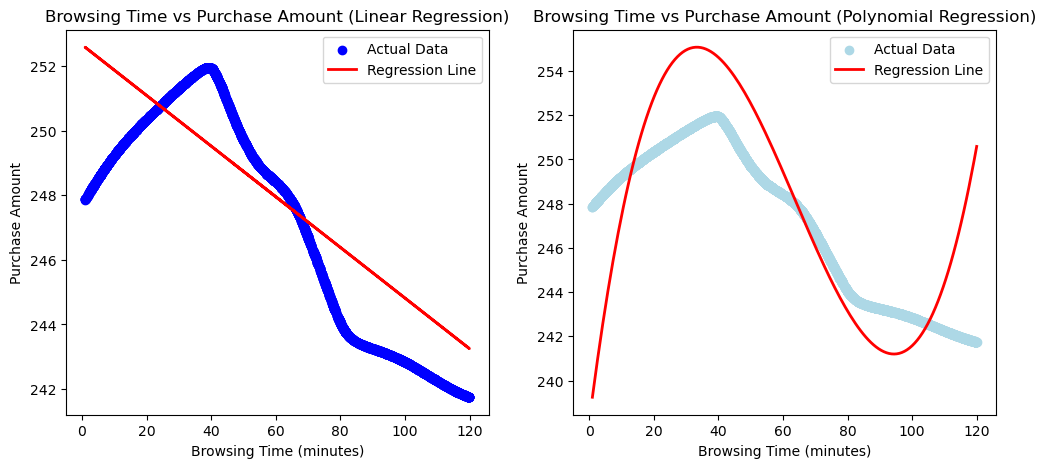

In [483]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


import scipy.stats as stats
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
x1 = np.array(df['Browsing_Time'])
y1 = np.array(df['Purchase_Amount'])


z = lowess(y1, x1, it=20)

zdf= pd.DataFrame(z)

# LINEAR REGRESSION
axes[0].scatter(zdf[0], zdf[1] , color="blue", label="Actual Data")
axes[0].plot(x1, y_pred, color="red", linewidth=2, label="Regression Line")

axes[0].set_xlabel("Browsing Time (minutes)")
axes[0].set_ylabel("Purchase Amount")
axes[0].set_title("Browsing Time vs Purchase Amount (Linear Regression)")
axes[0].legend()

# POLYNOMIAL REGRESSION

myline = np.linspace(1, 120, 150)
axes[1].scatter(zdf[0], zdf[1], color="lightblue", label="Actual Data")
axes[1].plot(myline, mymodel(myline), linewidth=2, color="red", label="Regression Line")

axes[1].set_xlabel("Browsing Time (minutes)")
axes[1].set_ylabel("Purchase Amount")
axes[1].set_title("Browsing Time vs Purchase Amount (Polynomial Regression)")
axes[1].legend()

plt.show()

Remark: The post-loess results show that the smoothened scattered plot of the Browsing Time vs Purchase Amount follows that of the polynomial regression's pattern

### Using robust regression methods on the data:

In [484]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error 

f_oneway(x1, y1)

F_onewayResult(statistic=5048.875525341885, pvalue=0.0)

In [485]:
x1 = np.array(df['Browsing_Time']).reshape(-1, 1)
y1 = np.array(df['Purchase_Amount'])

huber_regressor = HuberRegressor(epsilon=1.35) 
huber_regressor.fit(x1, y1) 

y_pred_huber = huber_regressor.predict(x1)

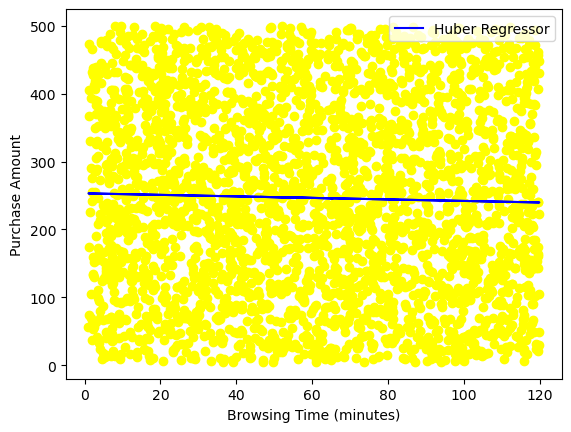

In [486]:
plt.scatter(x1, y1, color='yellow') 
plt.plot(x1, y_pred_huber, color='blue', label='Huber Regressor')
plt.xlabel("Browsing Time (minutes)")
plt.ylabel("Purchase Amount")
plt.legend() 
plt.show() 

### Computing the mean squared error and mean absolute error

In [487]:
mse_huber = mean_squared_error(y1, y_pred_huber) 
mae_huber = mean_absolute_error(y1, y_pred_huber)

print(f'Huber Regressor MSE: {mse_huber}')
print(f'Huber Regressor MAE: {mae_huber}')

Huber Regressor MSE: 19835.645067523186
Huber Regressor MAE: 120.88857412935901


Since the Mean squared error value is not close to zero, we can conclude that the Purchase_Amount vs Browsing_Time is not a good model.

In [488]:
x = sm.add_constant(x1)
result = sm.OLS(y1, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.092
Date:                Sat, 15 Mar 2025   Prob (F-statistic):              0.296
Time:                        16:41:20   Log-Likelihood:                -19099.
No. Observations:                3000   AIC:                         3.820e+04
Df Residuals:                    2998   BIC:                         3.821e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        252.6560      5.175     48.820      0.0

In addition to the Huber Regressor, the calculated <strong>R-squared = 0.000</strong> shows that the <strong>browsing time does not affect the purchase amount of the customers.</strong>

# TRIVARIATE/HYPERVARIATE DATA ANALYSIS

### Explore interaction effects between Browsing_Time and Category on Purchase_Amount using interaction plots.



In [489]:
df_Cat=df.groupby('Category')['Purchase_Amount'].sum()
df_Cat=pd.DataFrame(df_Cat)

df_Cat.head(10)

,Purchase_Amount
Category,
Beauty,144571.58
Books,157557.96
Clothing,156897.29
Electronics,145898.91
Home & Kitchen,138961.88


In [490]:
import statsmodels.formula.api as sm

model = sm.ols("Purchase_Amount ~ Browsing_Time * C(Category)", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Purchase_Amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9474
Date:                Sat, 15 Mar 2025   Prob (F-statistic):              0.482
Time:                        16:41:21   Log-Likelihood:                -19096.
No. Observations:                3000   AIC:                         3.821e+04
Df Residuals:                    2990   BIC:                         3.827e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

### Plotting

/Users/periperipapi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


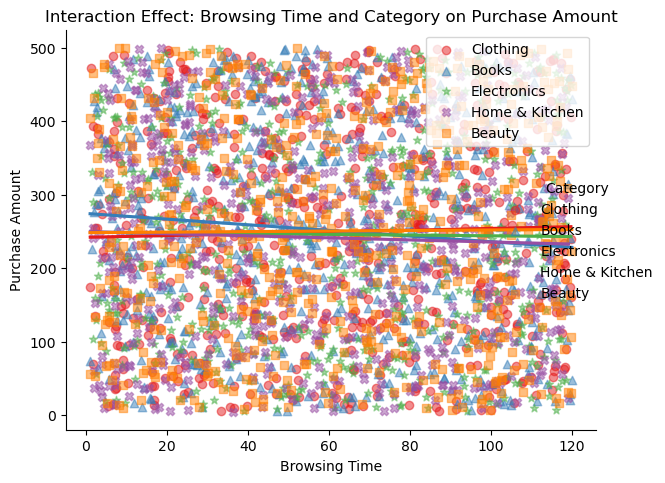

In [491]:
sns.lmplot(x="Browsing_Time", y="Purchase_Amount", hue="Category", data=df,
           ci=None, markers=["o","^", "*", "X", "s"], palette="Set1", scatter_kws={'alpha': 0.5})
plt.title("Interaction Effect: Browsing Time and Category on Purchase Amount")
plt.xlabel("Browsing Time")
plt.ylabel("Purchase Amount")
plt.legend()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

Remark: The p-values column from the previous table and the result of the interaction plot shows that the interaction between Browsing_Time and Category, nor their individual interaction <strong>has no significant effect on the Purchase_Amount.</strong>

### Coplots

In [492]:
df_beauty=df[df["Category"]=="Beauty"]
df_clothing=df[df["Category"]=="Clothing"]
df_books=df[df["Category"]=="Books"]
df_electronics=df[df["Category"]=="Electronics"]
df_hk=df[df["Category"]=="Home & Kitchen"]

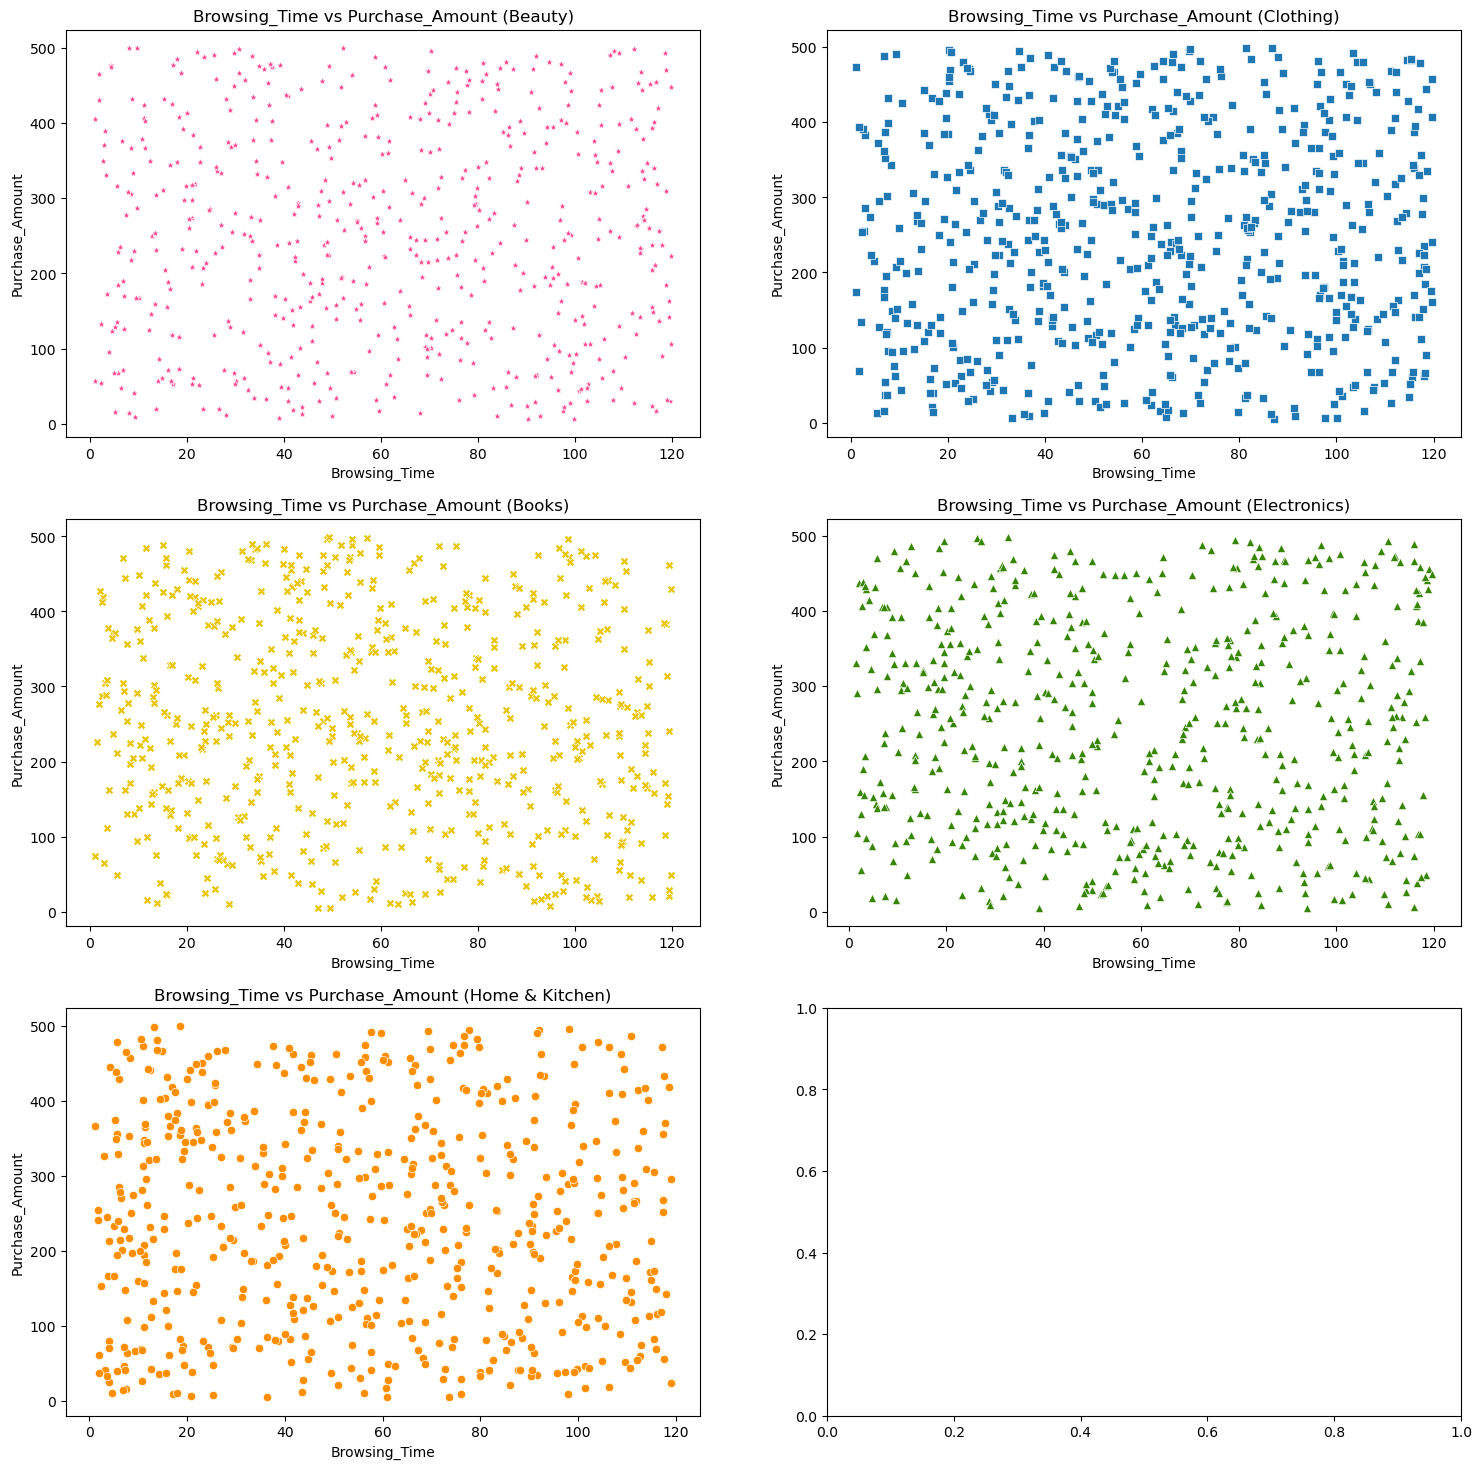

In [498]:
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

sns.scatterplot(ax=axes[0, 0], data=df_beauty, x='Browsing_Time', y='Purchase_Amount', marker="*", color="#ff4591")
axes[0,0].set_title("Browsing_Time vs Purchase_Amount (Beauty)")

sns.scatterplot(ax=axes[0, 1], data=df_clothing, x='Browsing_Time', y='Purchase_Amount', marker="s")
axes[0,1].set_title("Browsing_Time vs Purchase_Amount (Clothing)")

sns.scatterplot(ax=axes[1, 0], data=df_books, x='Browsing_Time', y='Purchase_Amount', marker="X", color="#eac402")
axes[1,0].set_title("Browsing_Time vs Purchase_Amount (Books)")

sns.scatterplot(ax=axes[1, 1], data=df_electronics, x='Browsing_Time', y='Purchase_Amount', marker="^", color="#368603")
axes[1,1].set_title("Browsing_Time vs Purchase_Amount (Electronics)")

sns.scatterplot(ax=axes[2, 0], data=df_hk, x='Browsing_Time', y='Purchase_Amount', marker="o", color="#ff8f00")
axes[2,0].set_title("Browsing_Time vs Purchase_Amount (Home & Kitchen)")
plt.show()

Remark: The scattered points in each interaction plot shows the insignificance of the interaction of Browsing_Time and Category on Purchase_Amount

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


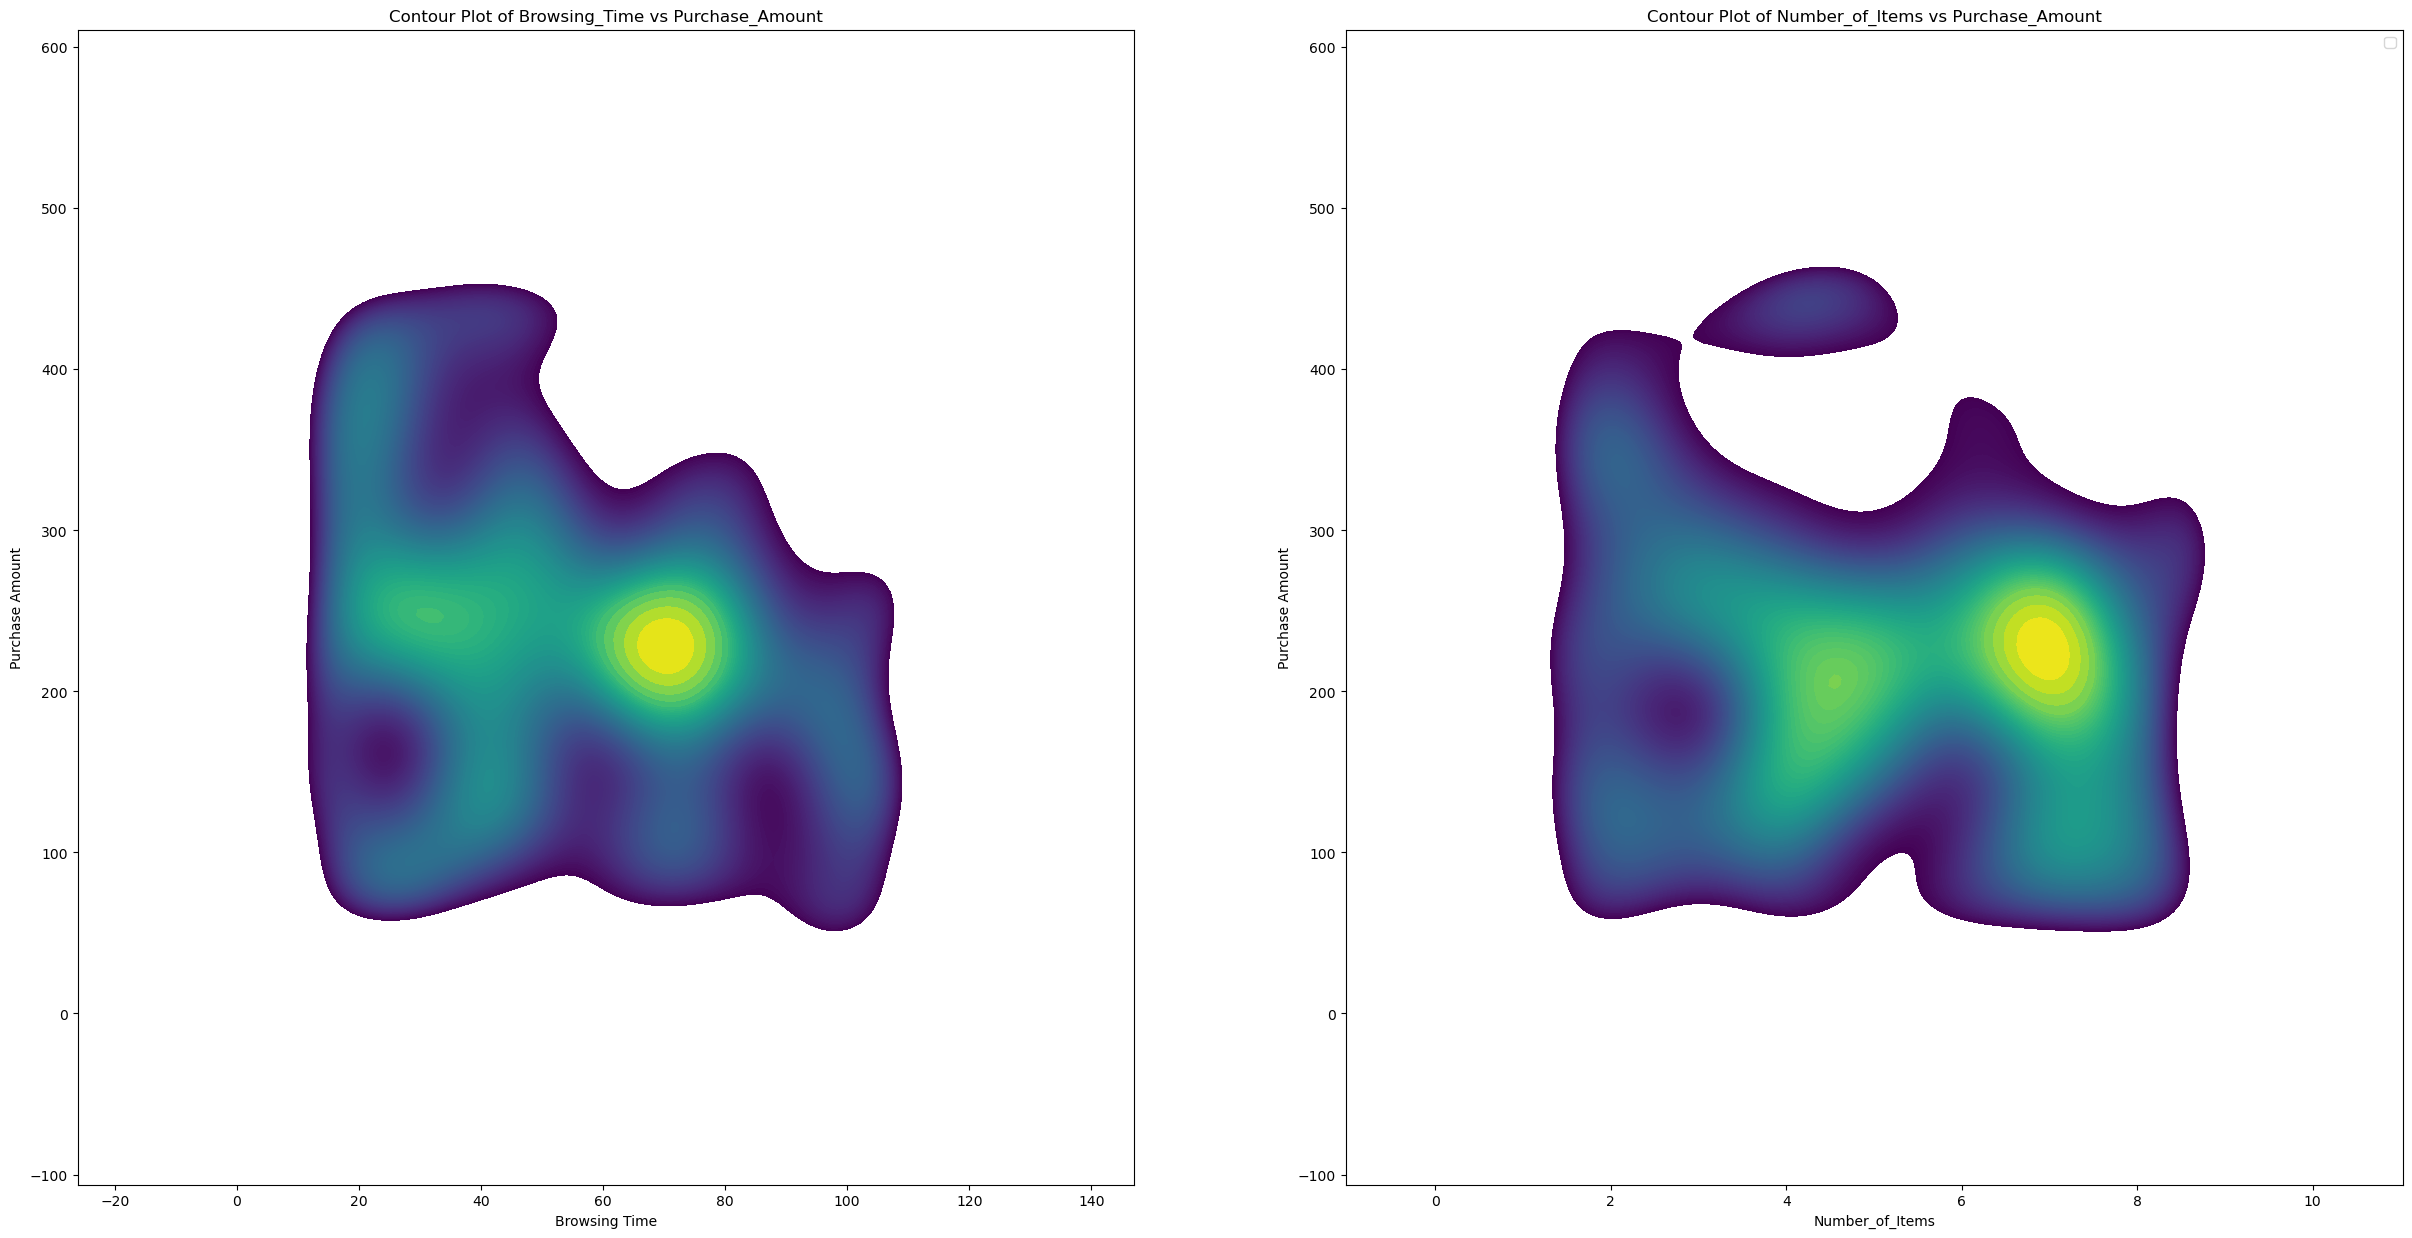

In [516]:
fig, axes = plt.subplots(1, 2, figsize=(30,15))

x1=np.array(df["Browsing_Time"])
x2=np.array(df["Number_of_Items"])
y1=np.array(df["Purchase_Amount"])

sns.kdeplot(ax = axes[0],x = x1, y = y1, fill = True, cmap="viridis", thresh=0.5, levels=100)
axes[0].set_title('Contour Plot of Browsing_Time vs Purchase_Amount')
axes[0].set_xlabel('Browsing Time')
axes[0].set_ylabel('Purchase Amount')

sns.kdeplot(ax = axes[1],x = x2, y = y1, fill = True, cmap="viridis", thresh=0.5, levels=100)
axes[1].set_title('Contour Plot of Number_of_Items vs Purchase_Amount')
axes[1].set_xlabel('Number_of_Items')
axes[1].set_ylabel('Purchase Amount')

plt.legend()
plt.show()

Remark: The scattered bright spots or the lack of linear pattern of the bright spots suggest the absence of relationship of the two independent variables with Purchase_Amount